<a href="https://colab.research.google.com/github/ivanlou/Machine-Learning-Data-Analytics-projects/blob/main/ENSF544FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENSF 544 Final Project
Names: Benson Li, Ivan Lou Tompong, Jack Li

Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


In [ ]:
#Imports

#Pandas
import pandas as pd
import numpy as np

#Matplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score


# Dataset
Importing the data: Either run the cell below after downloading the dataset and uploading it to the content file, or create a folder in your /content/drive/MyDrive called csvs and upload heart.csv to it and run the second command.

In [ ]:
#Create and view dataframe
df = pd.read_csv('/content/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# Only use if doing the method of importing from your personal Google Drive
from google.colab import drive
drive.mount('/content/drive')

filepath = '/content/drive/MyDrive/csvs/heart.csv'

#Create and view dataframe
df = pd.read_csv(filepath)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Processing/Cleaning

In [ ]:
X = df.drop(columns=['HeartDisease']) #Create the feature matrix
y = df['HeartDisease'] #Create Target Matrixs

#Print shape for feature and target matrix
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

#Check the data types for features and target
print("The data types of X are : \n{} ".format(X.dtypes))
print("The data types of y are : \n{} ".format(y.dtypes))

Shape of X: (918, 11)
Shape of y: (918,)
The data types of X are : 
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
dtype: object 
The data types of y are : 
int64 


In [ ]:
#Check for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

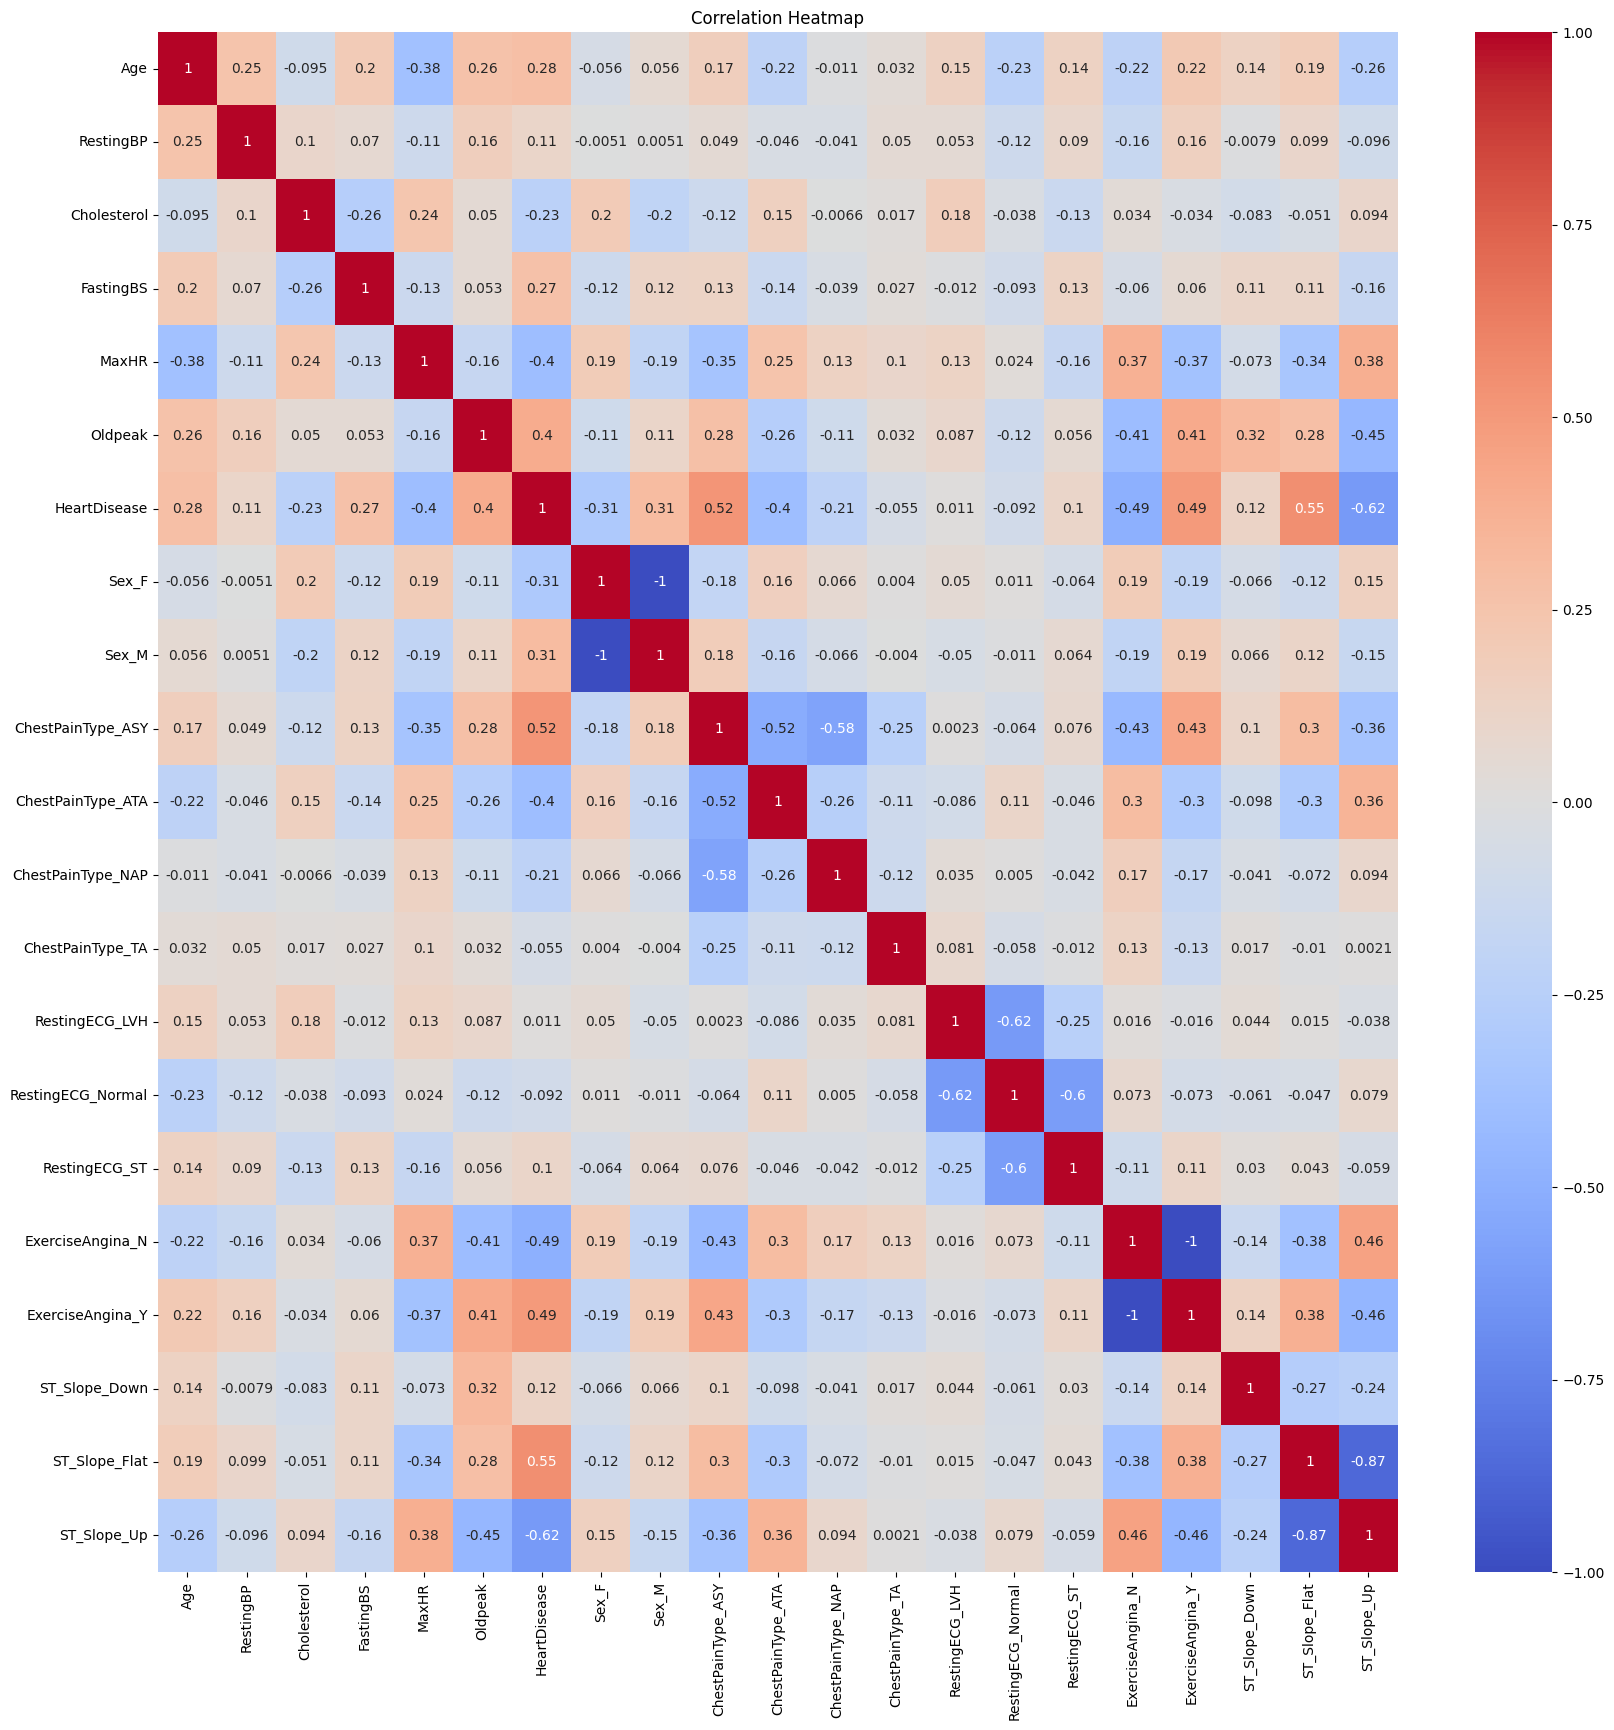

In [ ]:
#Visualize correlation between all variables
#Use one-hot encoding to encode non-numerical variables to create the corralation heatmap
features_to_encode = X.select_dtypes(include=['object']).columns

encoded_df = pd.get_dummies(df, columns = features_to_encode)

fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap')
plt.show()

# Classification

In [ ]:
#Find Numerical and Categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#Create transformer for numerical variables
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Create transformer for categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False))
])

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
#Split dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create pipelines for Logsistic Regression, K-Nearest Neighbours, and SVM

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [ ]:
#Create parameter grids for Logsistic Regression, K-Nearest Neighbours, and SVM
param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9]
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'linear']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200, 300],
        'classifier__max_depth': [5, 10, 15]
    }
]

#Define scoring metrics to be used
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

In [ ]:
#create function for parameter grid

def compare_models(model, pipeline, parameter_grid, scoring, X_train, y_train, X_test, y_test):
  print(f'Model name: {model} \n')

  #Create GridSearchCV instance
  grid_search = GridSearchCV(pipeline, parameter_grid, cv = 5, scoring = scoring, refit='f1_score')

  grid_search.fit(X_train, y_train) #fit model to data

  test_preds = grid_search.predict(X_test) #Make predictions

  #Calculate validation metrics
  accuracy = accuracy_score(y_test, test_preds)
  f1 = f1_score(y_test, test_preds)

  #Print results
  print("Test Accuracy:", accuracy)
  print("Test F1 Score:", f1)
  print("Best parameters:", grid_search.best_params_)
  print("Best_estimator:", grid_search.best_estimator_)
  print("Mean cross-validated score of the best_estimator:", grid_search.best_score_)

  #Print confusion matrix

  cm = confusion_matrix(y_test, test_preds)
  fig, axes = plt.subplots(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes)
  axes.set_title(model)
  axes.set_xlabel('Predicted')
  axes.set_ylabel('Actual')

  plt.tight_layout()
  plt.show()

  print("-----------------------------------")
  return [accuracy,f1]

# Results

**For the results below, a 0 means a negative reading (i.e., patient is normal) and a 1 is a positive reading (i.e., patient is at risk)**

Model name: Logsitic Regression 

Test Accuracy: 0.8586956521739131
Test F1 Score: 0.8737864077669902
Best parameters: {'classifier': LogisticRegression(C=0.1, max_iter=1000), 'classifier__C': 0.1}
Best_estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   Simpl

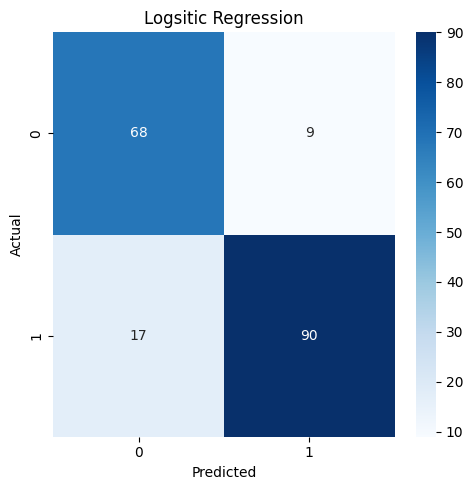

-----------------------------------
Model name: K-Nearest Neighbour 

Test Accuracy: 0.8532608695652174
Test F1 Score: 0.8695652173913043
Best parameters: {'classifier': KNeighborsClassifier(n_neighbors=7), 'classifier__n_neighbors': 7}
Best_estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                 

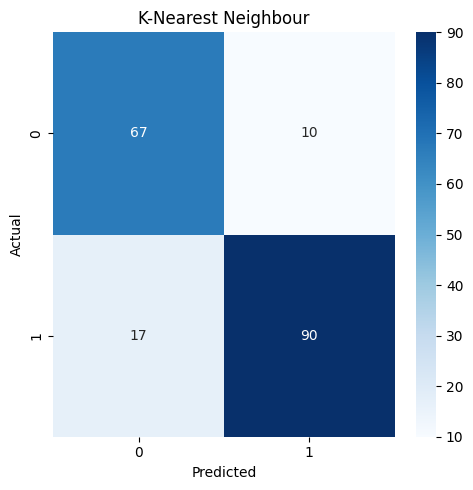

-----------------------------------
Model name: SVC 

Test Accuracy: 0.8641304347826086
Test F1 Score: 0.8826291079812206
Best parameters: {'classifier': SVC(C=1, gamma=0.1), 'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best_estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                    

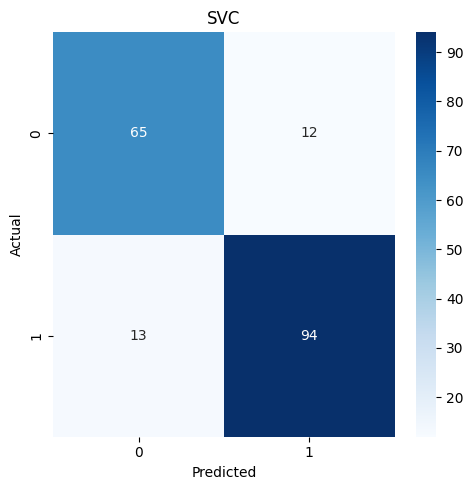

-----------------------------------
Model name: Random Forest 

Test Accuracy: 0.8858695652173914
Test F1 Score: 0.9014084507042254
Best parameters: {'classifier': RandomForestClassifier(max_depth=10), 'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best_estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
      

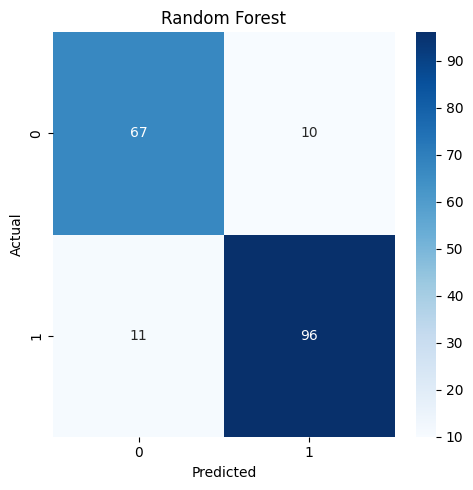

-----------------------------------


In [ ]:
results_lr=compare_models('Logsitic Regression', pipeline_lr, param_grid[0], scoring, X_train, y_train, X_test, y_test)
results_knn=compare_models('K-Nearest Neighbour', pipeline_knn, param_grid[1], scoring, X_train, y_train, X_test, y_test)
results_svm=compare_models('SVC', pipeline_svc, param_grid[2], scoring, X_train, y_train, X_test, y_test)
results_rf=compare_models('Random Forest', pipeline_rf, param_grid[3], scoring, X_train, y_train, X_test, y_test)

# Visualization of Results


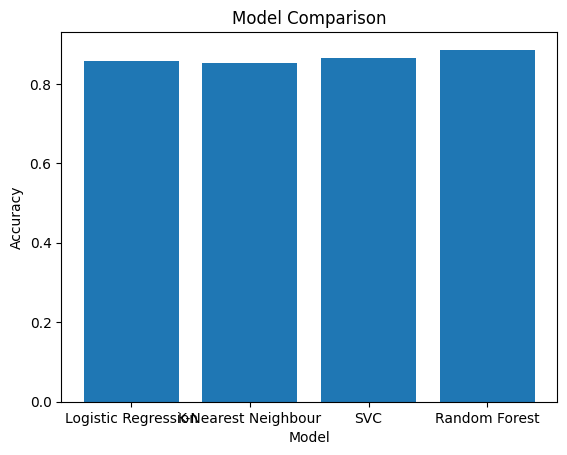

In [ ]:
#Visualization of the accuracy scores
model_names = ['Logistic Regression', 'K-Nearest Neighbour', 'SVC', 'Random Forest']
scores = [results_lr[0], results_knn[0], results_svm[0], results_rf[0]]

# Create the bar chart
plt.bar(model_names, scores)

# Add a title and axis labels
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.show()

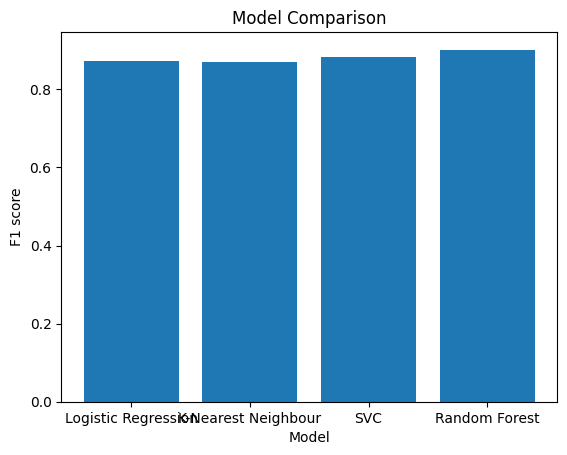

In [ ]:
#Visualization of the f1 scores
model_names = ['Logistic Regression', 'K-Nearest Neighbour', 'SVC', 'Random Forest']
scores = [results_lr[1], results_knn[1], results_svm[1], results_rf[1]]

# Create the bar chart
plt.bar(model_names, scores)

# Add a title and axis labels
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('F1 score')

# Show the plot
plt.show()

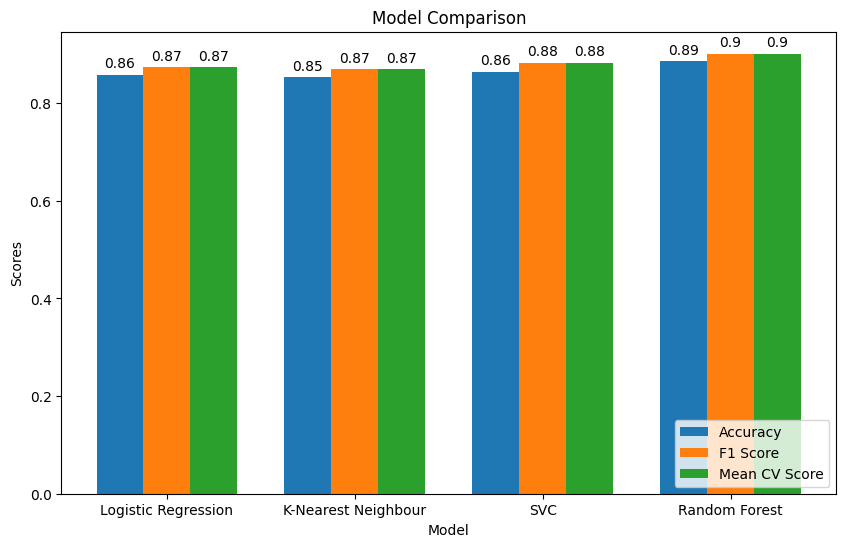

In [ ]:
# Results of each model
acc_scores = [results_lr[0], results_knn[0], results_svm[0], results_rf[0]]
f1_scores = [results_lr[1], results_knn[1], results_svm[1], results_rf[1]]
mean_cv_scores = [results_lr[-1], results_knn[-1], results_svm[-1], results_rf[-1]]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar width
bar_width = 0.25
index = np.arange(len(model_names))

# Plotting bars for accuracy
bars_acc = ax.bar(index, acc_scores, bar_width, label='Accuracy')

# Plotting bars for F1 scores
bars_f1 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1 Score')

# Plotting bars for mean CV scores
bars_cv = ax.bar(index + 2*bar_width, mean_cv_scores, bar_width, label='Mean CV Score')

# Add a title and axis labels
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Scores')

# Add x-axis ticks
plt.xticks(index + bar_width, model_names)

# Add legend
plt.legend(loc='lower right')

# Add numerical values on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_acc)
autolabel(bars_f1)
autolabel(bars_cv)

# Show the plot
plt.show()

# References
[1] FEDESORIANO. (2021). Heart Failure Prediction Dataset. Retrieved from www.kaggle.com website: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction